In [3]:
# Step 1: import libaraies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud


In [4]:
# pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [7]:
# step 2: load the dataset
data=pd.read_csv("netflix1.csv")
data

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"
...,...,...,...,...,...,...,...,...,...,...
8785,s8797,TV Show,Yunus Emre,Not Given,Turkey,1/17/2017,2016,TV-PG,2 Seasons,"International TV Shows, TV Dramas"
8786,s8798,TV Show,Zak Storm,Not Given,United States,9/13/2018,2016,TV-Y7,3 Seasons,Kids' TV
8787,s8801,TV Show,Zindagi Gulzar Hai,Not Given,Pakistan,12/15/2016,2012,TV-PG,1 Season,"International TV Shows, Romantic TV Shows, TV ..."
8788,s8784,TV Show,Yoko,Not Given,Pakistan,6/23/2018,2016,TV-Y,1 Season,Kids' TV


In [9]:
# display first few rows of the dataset
data.head()

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"


In [10]:
# step 3: data cleaning
# check for missing values
data.isnull().sum()

show_id         0
type            0
title           0
director        0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
dtype: int64

In [11]:
# drop the duplicates
data.drop_duplicates(inplace=True)

In [14]:
# drop rows with missing critical information
data.dropna(subset=['director','country'], inplace=True)

In [15]:
# Convert 'date_added' to datetime 
data['date_added'] = pd.to_datetime(data['date_added']) 

In [16]:
# Show data types to confirm changes 
data.dtypes

show_id                 object
type                    object
title                   object
director                object
country                 object
date_added      datetime64[ns]
release_year             int64
rating                  object
duration                object
listed_in               object
dtype: object

In [29]:
 data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8790 non-null   object        
 1   type          8790 non-null   object        
 2   title         8790 non-null   object        
 3   director      8790 non-null   object        
 4   country       8790 non-null   object        
 5   date_added    8790 non-null   datetime64[ns]
 6   release_year  8790 non-null   int64         
 7   rating        8790 non-null   object        
 8   duration      8790 non-null   object        
 9   listed_in     8790 non-null   object        
 10  genres        8790 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(9)
memory usage: 755.5+ KB


In [30]:
# Content distribution on Netflix.
data['type'].value_counts() 

type
Movie      6126
TV Show    2664
Name: count, dtype: int64

Text(0.5, 0.98, 'Total Content on Netflix')

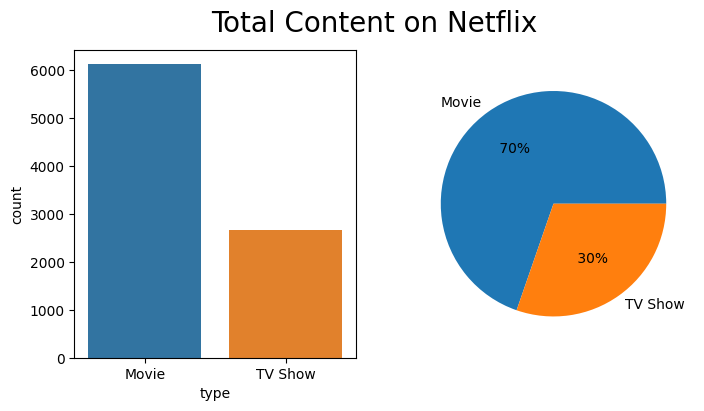

In [31]:
freq=data['type'].value_counts() 
fig, axes=plt.subplots(1,2, figsize=(8, 4)) 
sns.countplot(data, x=data['type'], ax=axes[0]) 
plt.pie(freq, labels=['Movie', 'TV Show'], autopct=' %.0f%% ') 
plt.suptitle('Total Content on Netflix', fontsize=20) 

In [32]:
# Visual representation of rating frequency of movies and TV Shows on Netflix. 

In [33]:
data['rating'].value_counts() 

rating
TV-MA       3205
TV-14       2157
TV-PG        861
R            799
PG-13        490
TV-Y7        333
TV-Y         306
PG           287
TV-G         220
NR            79
G             41
TV-Y7-FV       6
NC-17          3
UR             3
Name: count, dtype: int64

Text(0.5, 0.98, 'Rating on Netflix')

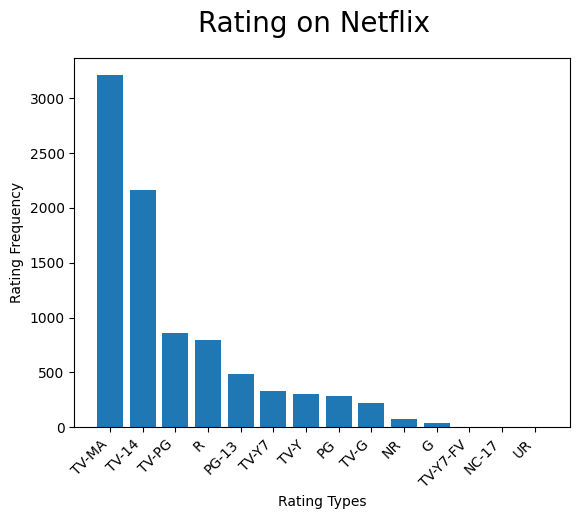

In [34]:
ratings=data['rating'].value_counts().reset_index().sort_values(by='count', ascending=False) 
plt.bar(ratings['rating'], ratings['count'])
plt.xticks(rotation=45, ha='right') 
plt.xlabel("Rating Types") 
plt.ylabel("Rating Frequency") 
plt.suptitle('Rating on Netflix', fontsize=20) 

Text(0.5, 0.98, 'Rating on Netflix')

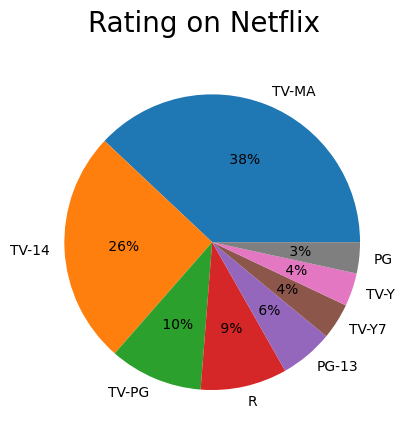

In [35]:
plt.pie(ratings['count'][:8], labels=ratings['rating'][:8], autopct=' %.0f%% ') 
plt.suptitle('Rating on Netflix',fontsize=20) 

In [36]:
# Converting date_added column to datetime. 

In [37]:
# lets convert column date_added to datetime. 
data['date_added']=pd.to_datetime(data['date_added']) 


In [38]:
data.describe() 

,date_added,release_year
count,8790,8790.000000
mean,2019-05-17 21:44:01.638225408,2014.183163
min,2008-01-01 00:00:00,1925.000000
25%,2018-04-06 00:00:00,2013.000000
50%,2019-07-03 00:00:00,2017.000000
75%,2020-08-19 18:00:00,2019.000000
max,2021-09-25 00:00:00,2021.000000
std,NaN,8.825466


In [39]:
data['country'].value_counts() 

country
United States     3240
India             1057
United Kingdom     638
Pakistan           421
Not Given          287
                  ... 
Iran                 1
West Germany         1
Greece               1
Zimbabwe             1
Soviet Union         1
Name: count, Length: 86, dtype: int64

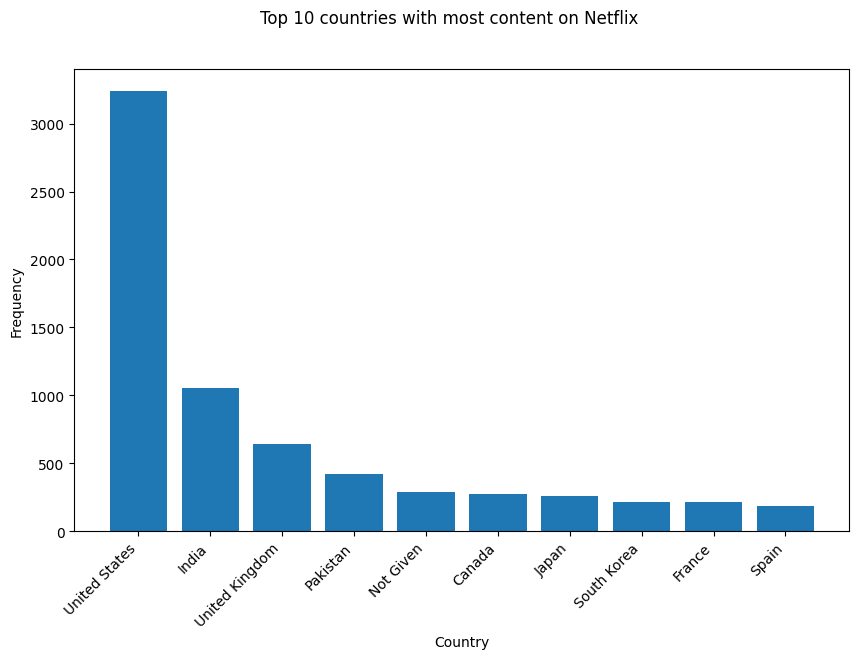

In [45]:
# Top 10 countries with most content on Netflix 
top_ten_countries=data['country'].value_counts().reset_index().sort_values(by='count', ascending=False)[:10] 
plt.figure(figsize=(10, 6)) 
plt.bar(top_ten_countries['country'], top_ten_countries['count']) 
plt.xticks(rotation=45, ha='right')
plt.xlabel("Country")
plt.ylabel("Frequency") 
plt.suptitle("Top 10 countries with most content on Netflix") 
plt.show() 

In [46]:
data['year']=data['date_added'].dt.year 
data['month']=data['date_added'].dt.month 
data['day']=data['date_added'].dt.day 

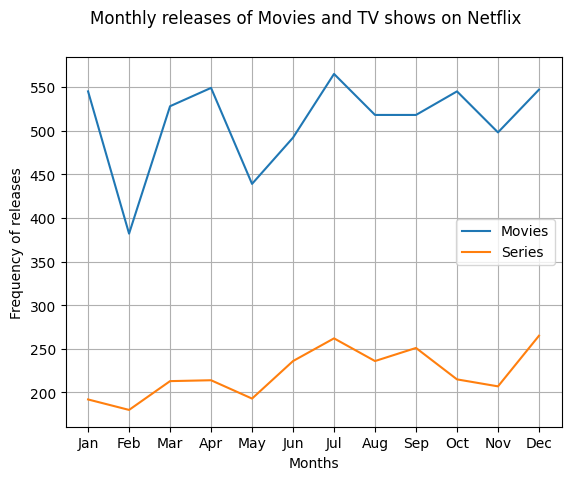

In [47]:
# Monthly releases of Movies and TV shows on Netflix 
monthly_movie_release=data[data['type']=='Movie']['month'].value_counts().sort_index () 
monthly_series_release=data[data['type']=='TV Show']['month'].value_counts().sort_index()
plt.plot(monthly_movie_release.index, monthly_movie_release.values, label='Movies') 
plt.plot(monthly_series_release.index, monthly_series_release.values, label='Series') 
plt.xlabel("Months") 
plt.ylabel("Frequency of releases") 
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend()
plt.grid(True) 
plt.suptitle("Monthly releases of Movies and TV shows on Netflix")
plt.show() 

In [48]:
# Yearly releases of Movies and TV Shows on Netflix 

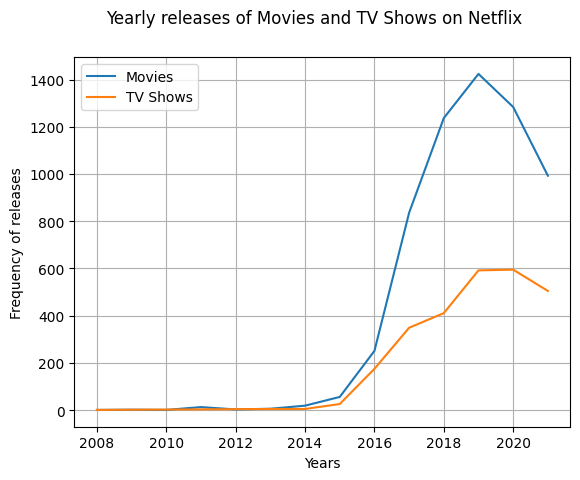

In [49]:
yearly_movie_releases=data[data['type']=='Movie']['year'].value_counts().sort_index( ) 
yearly_series_releases=data[data['type']=='TV Show']['year'].value_counts().sort_index()
plt.plot(yearly_movie_releases.index, yearly_movie_releases.values, label='Movies') 
plt.plot(yearly_series_releases.index, yearly_series_releases.values, label='TV Shows')
plt.xlabel("Years")
plt.ylabel("Frequency of releases") 
plt.grid(True) 
plt.suptitle("Yearly releases of Movies and TV Shows on Netflix") 
plt.legend()

In [50]:
# Top 10 popular movie genres 

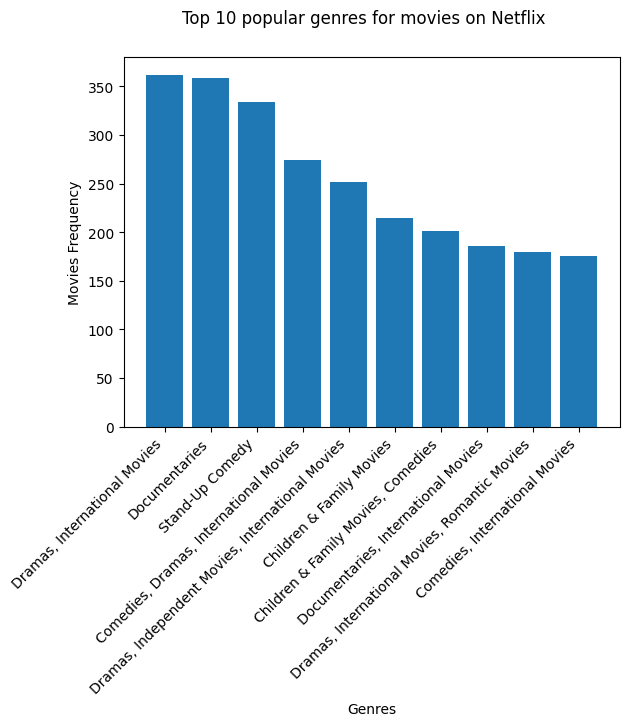

In [51]:
popular_movie_genre=data[data['type']=='Movie'].groupby("listed_in").size().sort_values(ascending=False)[:10] 
popular_series_genre=data[data['type']=='TV Show'].groupby("listed_in").size().sort_values(ascending=False)[:10]
plt.bar(popular_movie_genre.index, popular_movie_genre.values)
plt.xticks(rotation=45, ha='right')
plt.xlabel("Genres") 
plt.ylabel("Movies Frequency") 
plt.suptitle("Top 10 popular genres for movies on Netflix") 
plt.show()

In [52]:
# Top 10 TV Shows genres 

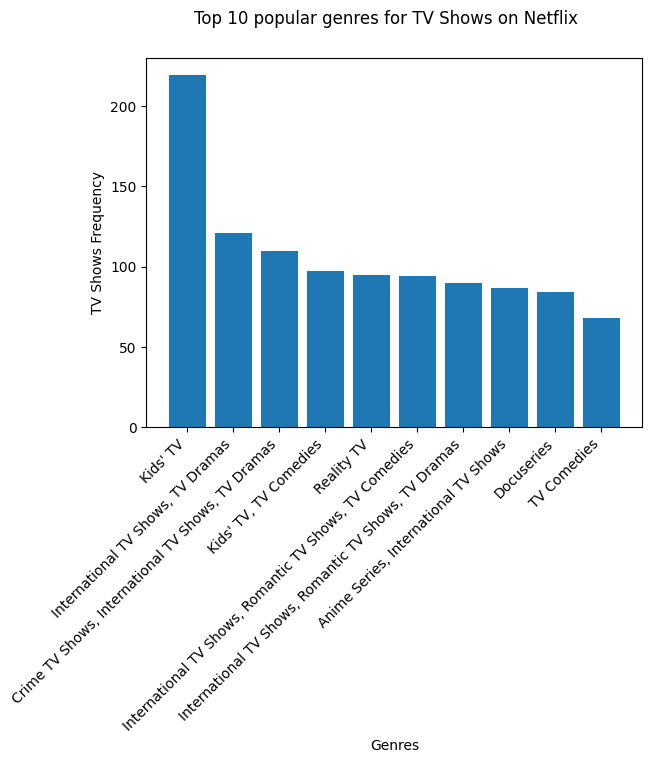

In [53]:
plt.bar(popular_series_genre.index, popular_series_genre.values) 
plt.xticks(rotation=45, ha='right') 
plt.xlabel("Genres") 
plt.ylabel("TV Shows Frequency") 
plt.suptitle("Top 10 popular genres for TV Shows on Netflix") 
plt.show()

In [54]:
# Top 15 directors across Netflix with high frequency of movies and shows. 

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13],
 [Text(0, 0, 'Rajiv Chilaka'),
  Text(1, 0, 'Alastair Fothergill'),
  Text(2, 0, 'Raúl Campos, Jan Suter'),
  Text(3, 0, 'Suhas Kadav'),
  Text(4, 0, 'Marcus Raboy'),
  Text(5, 0, 'Jay Karas'),
  Text(6, 0, 'Cathy Garcia-Molina'),
  Text(7, 0, 'Youssef Chahine'),
  Text(8, 0, 'Jay Chapman'),
  Text(9, 0, 'Martin Scorsese'),
  Text(10, 0, 'Steven Spielberg'),
  Text(11, 0, 'Mark Thornton, Todd Kauffman'),
  Text(12, 0, 'Don Michael Paul'),
  Text(13, 0, 'David Dhawan')])

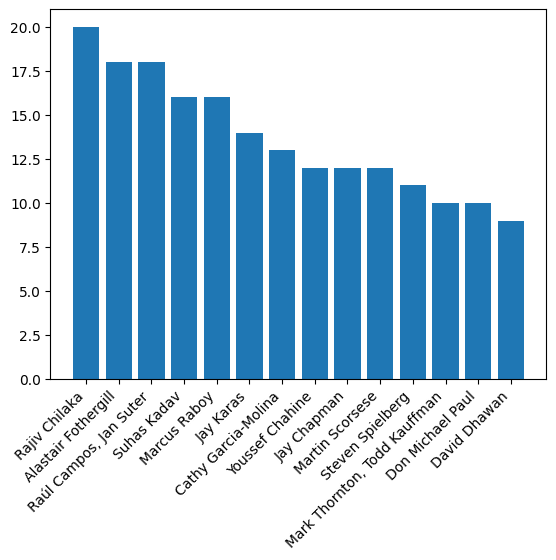

In [55]:
directors=data['director'].value_counts().reset_index().sort_values(by='count', ascending=False)[1:15] 
plt.bar(directors['director'], directors['count'])
plt.xticks(rotation=45, ha='right') 